In [2]:
pip install pandas matplotlib torch


Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.8.0-cp313-cp313-win_amd64.whl.metadata (30 kB)
  Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached markupsafe-3.0.3-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - ------------------------------------

Test RMSE: 2.3767


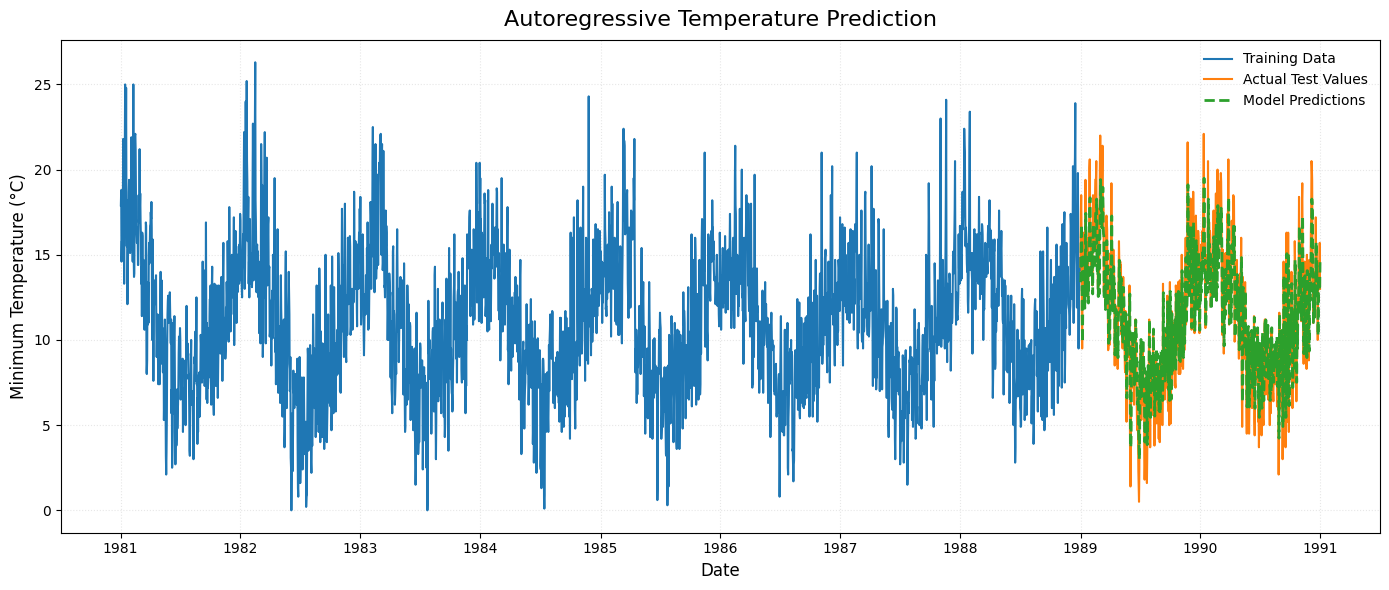

In [4]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Step 1: Load and prepare dataset
# ------------------------------------------------------------
df = pd.read_csv(r"C:\Users\user\OneDrive - iitgn.ac.in\Desktop\ML_ass2\my\auto_regressive.csv",
                 header=0, index_col=0, parse_dates=True)
temps = df["Temp"]

# Create autoregressive pairs (t vs t-1)
X_vals = torch.tensor(temps[:-1].values, dtype=torch.float32).reshape(-1, 1)
y_vals = torch.tensor(temps[1:].values, dtype=torch.float32).reshape(-1, 1)
n_samples = len(X_vals)

# Add bias term
X_aug = torch.cat([torch.ones((n_samples, 1)), X_vals], dim=1)

# Train-test split (80%-20%)
split_idx = int(0.8 * n_samples)
X_train, X_test = X_aug[:split_idx], X_aug[split_idx:]
y_train, y_test = y_vals[:split_idx], y_vals[split_idx:]

# ------------------------------------------------------------
# Step 2: Closed-form Linear Regression (Normal Equation)
# ------------------------------------------------------------
theta_hat = torch.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

# Predictions on test data
y_pred_test = X_test @ theta_hat

# RMSE computation
rmse_val = torch.sqrt(torch.mean((y_pred_test - y_test) ** 2))
print(f"Test RMSE: {rmse_val.item():.4f}")

# ------------------------------------------------------------
# Step 3: Visualization
# ------------------------------------------------------------
dates_all = df.index[1:]
dates_train = dates_all[:split_idx]
dates_test = dates_all[split_idx:]

plt.figure(figsize=(14, 6))
plt.plot(dates_train, y_train.numpy(), label="Training Data", color="#1f77b4")
plt.plot(dates_test, y_test.numpy(), label="Actual Test Values", color="#ff7f0e")
plt.plot(dates_test, y_pred_test.detach().numpy(), 
         label="Model Predictions", color="#2ca02c", linestyle="dashed", linewidth=2)

plt.title("Autoregressive Temperature Prediction", fontsize=16, pad=10)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Minimum Temperature (°C)", fontsize=12)
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=':')
plt.tight_layout()
plt.show()
